# Importing Libraries and Data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [63]:
data = pd.read_csv('train.csv')

In [64]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [66]:
data.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


In [67]:
data.shape

(14999, 9)

# Visualization

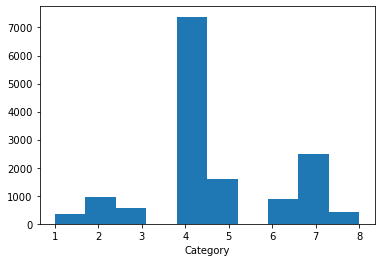

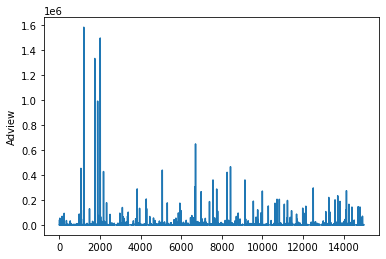

In [105]:
plt.hist(data["category"])
plt.xlabel('Category')
plt.show()
plt.plot(data["adview"])
plt.ylabel('Adview')
plt.show()

In [69]:
#removing outliers
data = data[data["adview"] <2000000]

              vidid    adview     views     likes  dislikes   comment  \
vidid      1.000000 -0.031081 -0.047582 -0.128861 -0.076461 -0.081060   
adview    -0.031081  1.000000  0.031177  0.046541  0.016686  0.017631   
views     -0.047582  0.031177  1.000000  0.726599  0.730216  0.410597   
likes     -0.128861  0.046541  0.726599  1.000000  0.648631  0.651215   
dislikes  -0.076461  0.016686  0.730216  0.648631  1.000000  0.532588   
comment   -0.081060  0.017631  0.410597  0.651215  0.532588  1.000000   
published -0.144474  0.055657  0.020110  0.096941  0.043745  0.114253   
duration   0.006912 -0.019592  0.002563 -0.042518  0.001587 -0.037478   
category  -0.038894 -0.004910  0.032822 -0.009175  0.011355 -0.034107   

           published  duration  category  
vidid      -0.144474  0.006912 -0.038894  
adview      0.055657 -0.019592 -0.004910  
views       0.020110  0.002563  0.032822  
likes       0.096941 -0.042518 -0.009175  
dislikes    0.043745  0.001587  0.011355  
comment    

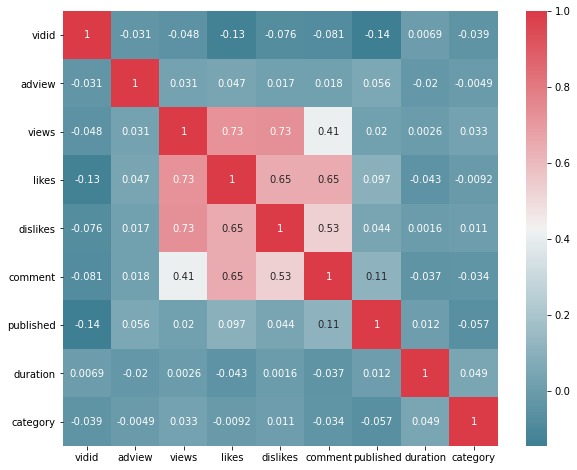

In [106]:
figure, axes = plt.subplots(figsize=(10, 8))
corr = data.corr()
print(corr)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=axes,annot=True)
plt.show()


# Cleaning Data

In [71]:
data=data[data.views!='F']
data=data[data.likes!='F']
data=data[data.dislikes!='F']
data=data[data.comment!='F']
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [72]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data["category"]=data["category"].map(category)
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


# Transformation of Data

In [73]:
data["views"] = pd.to_numeric(data["views"])
data["comment"] = pd.to_numeric(data["comment"])
data["likes"] = pd.to_numeric(data["likes"])
data["dislikes"] = pd.to_numeric(data["dislikes"])
data["adview"]=pd.to_numeric(data["adview"])
column_vidid=data['vidid']

In [74]:
from sklearn.preprocessing import LabelEncoder
data['duration']=LabelEncoder().fit_transform(data['duration'])
data['vidid']=LabelEncoder().fit_transform(data['vidid'])
data['published']=LabelEncoder().fit_transform(data['published'])
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [75]:
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)
data["duration"]=time1
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


# Spilting of Data into train and test set

In [76]:
y_train = pd.DataFrame(data = data.iloc[:, 1].values, columns = ['target'])
data_train=data.drop(["adview"],axis=1)
data_train=data.drop(["vidid"],axis=1)
data_train.head()


,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2168,457,6
1,2,1707,56,2,6,2185,570,4
2,1,2023,25,0,2,2094,136,3
3,6,620860,777,161,153,2119,262,8
4,1,666,1,0,0,2091,31,4


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, y_train, test_size=0.2, random_state=42)

In [78]:
X_train.shape

(11708, 8)

In [79]:
X_test.shape

(2928, 8)

In [80]:
y_train.shape

(11708, 1)

In [81]:
y_test.shape

(2928, 1)

# Normalization of Data

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.15230461837422657

# Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

# Support Vector Regressor

In [84]:
from sklearn.svm import SVR
support_vector_regressor = SVR()
support_vector_regressor.fit(X_train,y_train)

SVR()

# Decision Tree Regressor

In [85]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

# Gradient Boosting Regressor

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
gradient_boosting_model = GradientBoostingRegressor(n_estimators=30)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=30)

# Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators=150, max_depth=25, min_samples_split=15)
random_forest_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_split=15, n_estimators=150)

# Artificial Neural Network

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [90]:
model = Sequential()
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=["mean_squared_error"])
history=model.fit(X_train,y_train,epochs=100)
model.summary()

Epoch 1/100
366/366 [==============================] - 1s 1ms/step - loss: 767407808.0000 - mean_squared_error: 767407808.0000
Epoch 2/100
366/366 [==============================] - 1s 1ms/step - loss: 767405568.0000 - mean_squared_error: 767405568.0000
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 767398016.0000 - mean_squared_error: 767398016.0000
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 767381440.0000 - mean_squared_error: 767381440.0000
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 767350592.0000 - mean_squared_error: 767350592.0000
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 767308736.0000 - mean_squared_error: 767308736.0000
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 767255296.0000 - mean_squared_error: 767255296.0000
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 767190592.0000 - mean_squared_error:

366/366 [==============================] - 1s 1ms/step - loss: 761931328.0000 - mean_squared_error: 761931328.0000
Epoch 64/100
366/366 [==============================] - 0s 1ms/step - loss: 761837632.0000 - mean_squared_error: 761837632.0000
Epoch 65/100
366/366 [==============================] - 0s 934us/step - loss: 761740736.0000 - mean_squared_error: 761740736.0000
Epoch 66/100
366/366 [==============================] - ETA: 0s - loss: 767090368.0000 - mean_squared_error: 767090368.00 - 1s 2ms/step - loss: 761641728.0000 - mean_squared_error: 761641728.0000
Epoch 67/100
366/366 [==============================] - 0s 1ms/step - loss: 761547200.0000 - mean_squared_error: 761547200.0000
Epoch 68/100
366/366 [==============================] - 0s 774us/step - loss: 761444480.0000 - mean_squared_error: 761444480.0000
Epoch 69/100
366/366 [==============================] - 0s 961us/step - loss: 761346944.0000 - mean_squared_error: 761346944.0000
Epoch 70/100
366/366 [=====================

# Picking the best model based on error as well as generalisation

In [91]:
from sklearn import metrics

models_dict = {
               'Linear Regression Model':linear_regressor,
               'Support Vector Regression':support_vector_regressor,
               'Decision Tree':decision_tree_regressor, 
               'Gradient Boosting':gradient_boosting_model, 
               'Random Forest':random_forest_regressor,
               'Artificial Neral Network':model
              }

def print_error(X_test, y_test, model):
    prediction = model.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [92]:
for model_name, m in models_dict.items():
    print(model_name)
    print_error(X_test, y_test, m)
    print("*"*50)


Linear Regression Model
Mean Absolute Error: 318.44444106234386
Mean Squared Error: 29348199.860513885
Root Mean Squared Error: 5417.397886487007
**************************************************
Support Vector Regression
Mean Absolute Error: 1696.915128586595
Mean Squared Error: 833667045.124584
Root Mean Squared Error: 28873.2929387104
**************************************************
Decision Tree
Mean Absolute Error: 222.8162568306011
Mean Squared Error: 11587809.764344262
Root Mean Squared Error: 3404.0872145619687
**************************************************
Gradient Boosting
Mean Absolute Error: 249.50112306635006
Mean Squared Error: 5427217.727350819
Root Mean Squared Error: 2329.638969314949
**************************************************
Random Forest
Mean Absolute Error: 326.294312826171
Mean Squared Error: 38882443.86659703
Root Mean Squared Error: 6235.578871812707
**************************************************
Artificial Neral Network
Mean Absolute Error: 2

## So from above results Decision Tree Regressor model has least error and is best fitted for this dataset

In [103]:
predictions_svr = decision_tree_regressor.predict(X_test)
predictedValue = pd.DataFrame(predictions_svr, columns=['Predicted Adview'])
predictedValue.head()
predictedValue.to_csv('predicted value.csv')

In [104]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree_regressor, "decisiontree_youtubeadviewprediction.pkl")
# Saving Keras Artificial Neural Network model
model.save("ann_youtubeadviewprediction.h5")